In [93]:
from pandas import read_csv, unique
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('C:/WISDM.csv', index_col=0)
df = df.drop(['user-id', 'timestamp'], axis=1)

Jogging = df[df['activity']=='Jogging'].head(4500)
Sitting = df[df['activity']=='Sitting'].head(4499)
Sitting['activity']=0
Jogging['activity']=1
new_df = pd.concat([Sitting,Jogging]).sample(frac=1).reset_index(drop=True)
new_df


,activity,X,Y,Z
0,0,-4.400000,-2.260000,8.199450
1,1,2.764931,0.081722,3.146300
2,1,17.434046,18.115063,-0.340509
3,0,3.150000,9.280000,1.184970
4,1,-2.451662,-4.521955,-1.307553
...,...,...,...,...
8994,1,6.047434,5.897611,1.375655
8995,1,-0.299648,5.597963,5.747787
8996,0,3.260000,9.280000,1.144109
8997,1,-6.047434,12.598822,-2.955615


In [95]:
X_train, X_test = train_test_split(new_df, test_size=0.2, random_state=42)
X_train = X_train[X_train.activity == 0]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape, y_test.shape


((3595, 3), (1800, 3), (1800,))

In [96]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim, ))
encoder = Dense(2, activation="relu")(input_layer)
decoder = Dense(input_dim)(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_47 (Dense)            (None, 2)                 8         
                                                                 
 dense_48 (Dense)            (None, 3)                 9         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
from keras.callbacks import ModelCheckpoint, TensorBoard

nb_epoch = 200
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mse', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=[checkpointer]).history

Epoch 1/200
102/102 [==============================] - 1s 3ms/step - loss: 38.7615 - accuracy: 0.8912 - val_loss: 34.7803 - val_accuracy: 1.0000
Epoch 2/200
102/102 [==============================] - 0s 2ms/step - loss: 29.7354 - accuracy: 0.9994 - val_loss: 28.0190 - val_accuracy: 0.9722
Epoch 3/200
102/102 [==============================] - 0s 2ms/step - loss: 24.8975 - accuracy: 0.6034 - val_loss: 24.2136 - val_accuracy: 0.4861
Epoch 4/200
102/102 [==============================] - 0s 2ms/step - loss: 21.9685 - accuracy: 0.5425 - val_loss: 21.8235 - val_accuracy: 0.4861
Epoch 5/200
102/102 [==============================] - 0s 1ms/step - loss: 19.9501 - accuracy: 0.5425 - val_loss: 20.1440 - val_accuracy: 0.4861
Epoch 6/200
102/102 [==============================] - 0s 1ms/step - loss: 18.3801 - accuracy: 0.5425 - val_loss: 18.7946 - val_accuracy: 0.4861
Epoch 7/200
102/102 [==============================] - 0s 1ms/step - loss: 17.0118 - accuracy: 0.5425 - val_loss: 17.5506 - val_ac

Epoch 58/200
102/102 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 59/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 60/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 61/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 62/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 63/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 64/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy:

Epoch 115/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 116/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 117/200
102/102 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 118/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 119/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 120/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 121/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.0316 - val_ac

102/102 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 172/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 173/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 174/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 175/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 176/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 177/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000

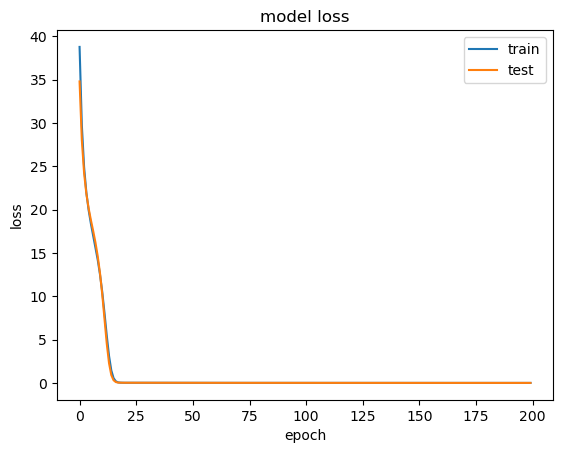

In [99]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [100]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 [==============================] - 0s 821us/step


,reconstruction_error,true_class
count,1800.000000,1800.000000
mean,7.943906,0.497778
std,15.961626,0.500134
min,0.000002,0.000000
25%,0.015795,0.000000
50%,0.128146,0.000000
75%,7.968453,1.000000
max,153.417083,1.000000


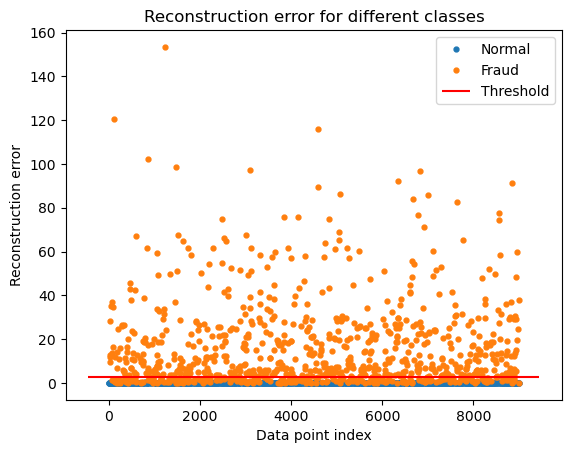

In [101]:
threshold = 2.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

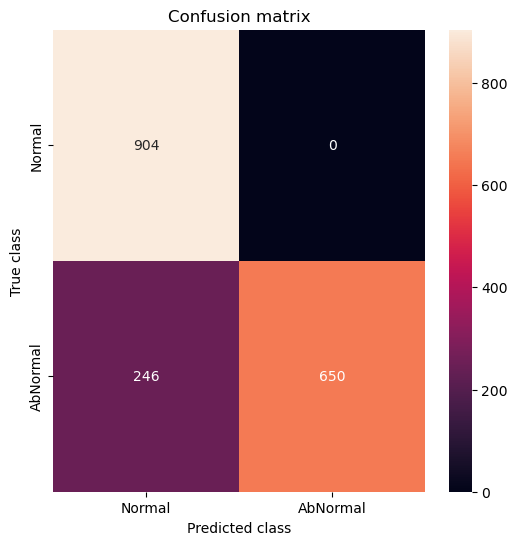

In [104]:
LABELS = ["Normal", "AbNormal"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [103]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.8633333333333333
Precision : 1.0
Recall : 0.7254464285714286
F1 : 0.8408796895213454
